<a href="https://colab.research.google.com/github/3hungdc/Customer_Churn_Telco/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# EXP1: Ko Unsampling, Ko Scale Model: XGBoost, Gradient Boosting, RFC
# EXP2: Ko Unsampling, Scaling. Model: Log, XGBoost, Gradient Boosting, RFC, 
# EXP3: UpSampling, No Scaling. Model: Log, XGBoost, Gradient Boosting, RFC, 

In [7]:
!pip install xgboost
!pip install imbalanced-learn
!pip install category_encoders

In [8]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

In [9]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [10]:
df_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [12]:
# Xem qua dữ liệu: EDA
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [13]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [14]:
object_cols = [f for f in df_train.columns if df_train[f].dtype == "O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


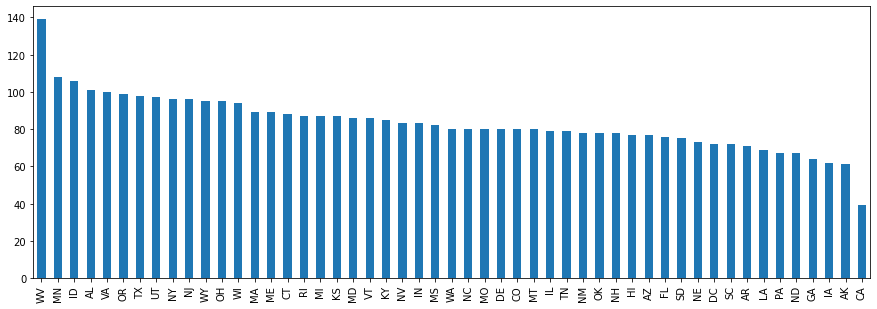

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64


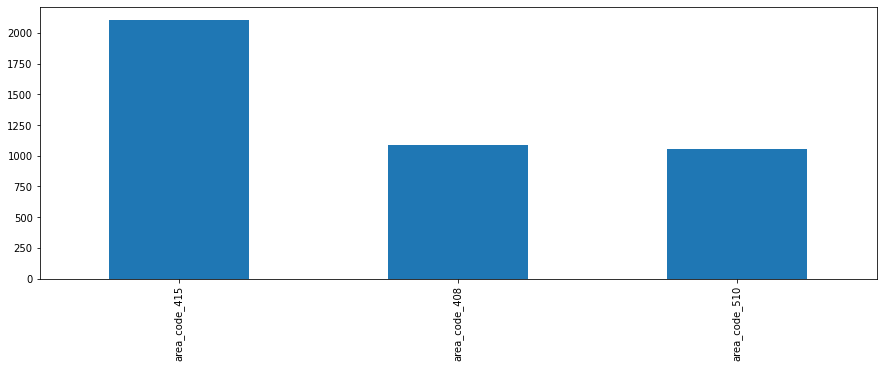

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64


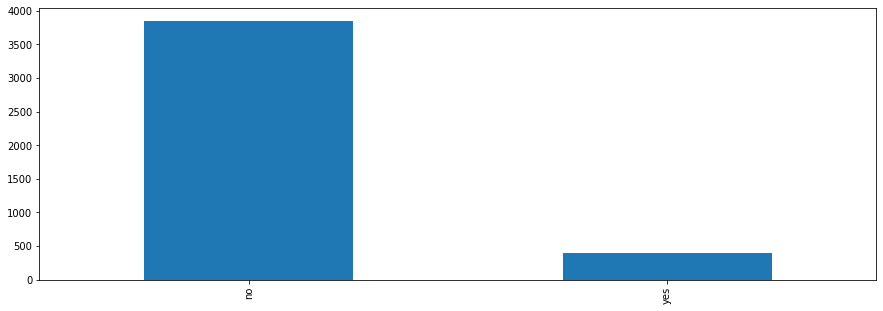

no     3854
yes     396
Name: international_plan, dtype: int64


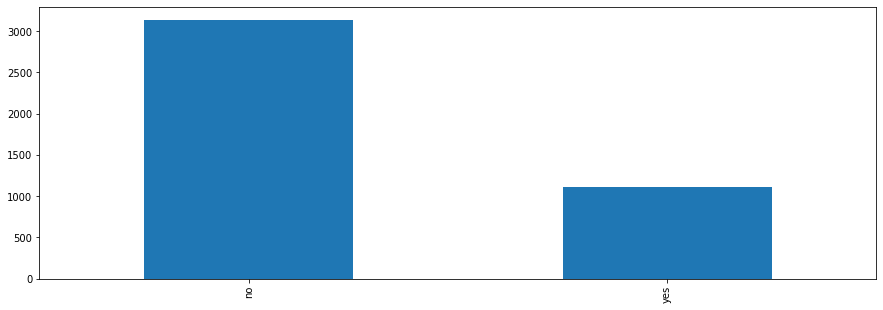

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64


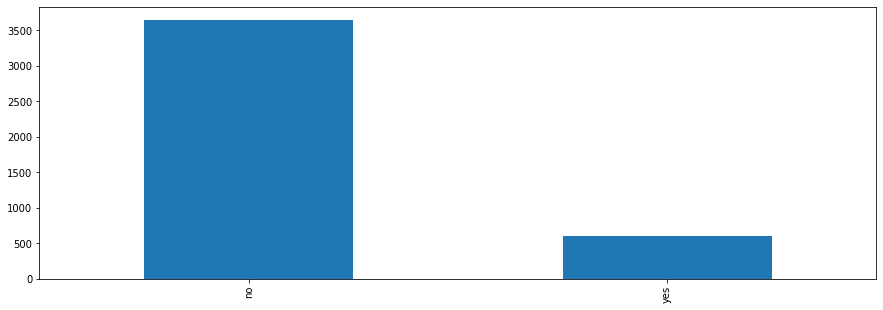

no     3652
yes     598
Name: churn, dtype: int64


In [15]:
for column in object_cols:
  df_train[column].value_counts().plot(kind="bar",figsize =(15,5))
  plt.show()
  print(df_train[column].value_counts())

###Preprocessing

In [16]:
dataset = df_train.copy()

In [17]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [18]:
# Vì trường State có quá nhiều category. Vì vậy không dùng OneHotEncoder được
# Cần dùng HashingEncoder nằm trong category_encoders
# OneHotEncoder hay get_Dummy ko làm mất thông tin. Nhưng hashing làm mất thông tin
he = ce.HashingEncoder(cols='state')
dataset_hash = he.fit_transform(dataset)
dataset_hash


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [19]:
dataset_hash_dummy = pd.get_dummies(dataset_hash,drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,1,0,0,1,0
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,0,0,1,0,0
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,1,0,1,0,0
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9.62,10.3,6,2.78,0,1,0,0,0,0
4246,0,0,0,0,0,0,1,0,73,0,...,8.38,11.5,6,3.11,3,0,0,0,0,0
4247,1,0,0,0,0,0,0,0,75,0,...,5.81,6.9,7,1.86,1,0,0,0,0,0
4248,0,0,0,0,0,0,1,0,50,40,...,13.39,9.9,5,2.67,2,0,0,0,1,0


In [20]:
corr = dataset_hash_dummy.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.00,-0.20,-0.13,-0.15,-0.19,-0.11,-0.20,-0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.04,0.00,-0.00,-0.02,-0.00,-0.00,0.02,-0.00,-0.01,0.01,-0.02,-0.00,-0.01,-0.04
col_1,-0.20,1.00,-0.13,-0.16,-0.20,-0.11,-0.20,-0.15,-0.00,-0.02,0.03,0.02,0.03,-0.00,0.00,-0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.02,0.01,-0.01,-0.01,-0.02,0.04
col_2,-0.13,-0.13,1.00,-0.10,-0.13,-0.07,-0.13,-0.09,-0.00,-0.03,-0.02,-0.01,-0.02,0.03,-0.04,0.03,-0.00,0.00,-0.00,0.00,0.02,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01
col_3,-0.15,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.01,0.03,-0.01,0.02,-0.01,0.02,0.00,0.02,0.02,0.02,0.02,-0.00,-0.02,-0.00,0.01,0.02,-0.01,0.01,0.03,-0.01
col_4,-0.19,-0.20,-0.13,-0.16,1.00,-0.11,-0.20,-0.14,0.01,0.01,0.03,-0.00,0.03,0.01,0.01,0.01,0.03,-0.01,0.03,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,0.02,0.00,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.00,0.02,-0.02,-0.00,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.00,-0.03,-0.00,0.01,-0.00,0.01,0.01,0.02,0.03
col_6,-0.20,-0.20,-0.13,-0.16,-0.20,-0.11,1.00,-0.15,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,-0.03,-0.05,-0.02,0.01,-0.02,0.03,0.02,0.03,-0.00,0.00,0.01,-0.02,0.00,-0.03
col_7,-0.14,-0.15,-0.09,-0.12,-0.14,-0.08,-0.15,1.00,-0.02,-0.00,-0.02,-0.01,-0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.02,0.03,0.01,0.01,-0.02
account_length,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.02,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.02,0.03,0.00,0.02
number_vmail_messages,-0.01,-0.02,-0.03,0.03,0.01,0.02,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.01,-0.01,0.00,0.95,-0.10


In [21]:
# Nhìn vào bảng trên thì thấy ngay các biến có tự tương quan với nhau
# Vậy là cần drop 1 vài cột đi để cho các biến đầu vào ko phụ thuộc với nhau (Chỉ cần giữ lại 1 cho không tự tương quan nữa)
dataset_hash_dummy_drop =  dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

#Exp1: Upsampling = SMOTE , Scale = MinMax và dùng Logistics

In [22]:
X = dataset_hash_dummy_drop.drop(['churn_yes'],axis = 1)
y = dataset_hash_dummy_drop['churn_yes']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)

In [24]:
sm = SMOTE(k_neighbors = 5)

In [25]:
X_train_resample , y_train_resample = sm.fit_resample(X_train, y_train)

In [26]:
scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       721
           1       0.57      0.32      0.41       129

    accuracy                           0.86       850
   macro avg       0.73      0.64      0.66       850
weighted avg       0.84      0.86      0.84       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


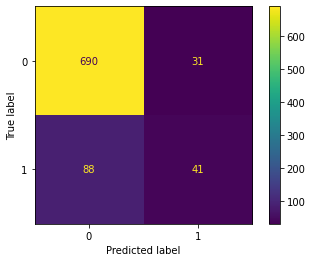

In [27]:
# Logistic Regression
model_log = LogisticRegression() 
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( y_test, y_pred))

plot_confusion_matrix(model_log, X_test, y_test)

In [28]:
# Các recall. f1 score không tốt khi phát hiện KH rời bỏ dịch vụ

# Exp 2: XGBOOST, Ko Upsampling, Ko Scale

In [29]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       721
           1       0.97      0.81      0.88       129

    accuracy                           0.97       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.97      0.97      0.97       850



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


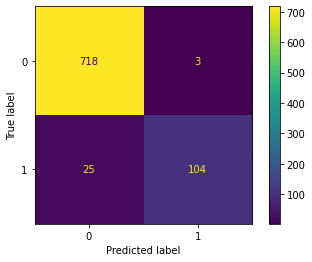

In [30]:
# XGBoost

import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)
# In bao cao ket qua
print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test) 



In [31]:
# Dùng XGBoost đã cho f1 và recall khá tốt rồi.

# Submit ket qua len Kaggle

In [32]:
test = pd.read_csv("/content/test.csv")
id_submit = test['id']

In [33]:
test.drop(columns=['id'], inplace=True)

In [34]:
test_hash_state = he.fit_transform(test)
test_hash_state.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,0,0,0,0,0,0,128,area_code_415,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,0,0,0,0,0,0,118,area_code_510,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,0,0,0,0,1,62,area_code_415,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,0,1,0,0,0,93,area_code_510,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,1,0,0,0,0,0,0,0,174,area_code_415,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [35]:
test_dummy =  pd.get_dummies(test_hash_state,drop_first=True)
test_dummy_drop_corr = test_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


In [36]:
test_dummy_drop_corr.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_yes'],
      dtype='object')

In [37]:
y_pred_submit = model_xgb.predict(test_dummy_drop_corr)

In [38]:
y_pred_submit

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
submit_result = pd.DataFrame({'id': id_submit,'churn': y_pred_submit})
submit_result

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [40]:
submit_result.churn.replace([0,1],['no','yes'],inplace=True)
submit_result

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [42]:
submit_result.to_csv("hungpn12_Kaggle_submit.csv",index = False)